<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **ReAct: Build Reasoning and Acting AI Agents with LangGraph**


Estimated time needed: **90** minutes


You're a software engineer on a mission: build an AI agent that doesn't just respond—it thinks. In this lab, you'll step into the role of an AI architect, designing a smart assistant that solves tough problems by reasoning through them and taking purposeful actions.

Using the ReAct (Reasoning + Acting) framework, you'll teach your agent to think step by step, consult tools like search engines or calculators, and adapt on the fly. It’s not just about answers—it’s about how the agent gets there.

By the end of the lab, your AI will face a mystery that can’t be solved with knowledge alone. It will need logic, resourcefulness, and the ability to act—just like you, the engineer who built it.

## What is ReAct?

**ReAct** stands for **Reasoning + Acting**. It's a framework that combines:

1. **Reasoning**: The agent thinks through problems step by step, maintaining an internal dialogue about what it needs to do.
2. **Acting**: The agent can use external tools (search engines, calculators, APIs) to gather information or perform actions.
3. **Observing**: The agent processes the results from its actions and incorporates them into its reasoning.

This creates a powerful loop: **Think → Act → Observe → Think → Act → ...**

### Why ReAct Matters

Traditional language models are limited by their training data cutoff and can't access real-time information. ReAct agents overcome this by:
- Accessing current information through web searches
- Performing calculations with specialized tools
- Breaking down complex problems into manageable steps
- Adapting their approach based on intermediate results


## __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup-&-Installation">Setup & Installation</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
        </ol>
    </li>
    <li>
        <a href="#Understanding-Tools-in-ReAct">Understanding Tools in ReAct</a>
        <ol>
            <li><a href="#1.-Web-Search-Tool">1. Web Search Tool</a></li>
            <li><a href="#Theory-behind-Web-Search-Tools">Theory behind Web Search Tools</a></li>
            <li><a href="#Testing-the-Search-Tool">Testing the Search Tool</a></li>
            <li><a href="#2.-Clothing-Recommendation-Tool">2. Clothing Recommendation Tool</a></li>
            <li><a href="#Why-this-Tool-Matters">Why this Tool Matters</a></li>
            <li><a href="#Creating-the-tool-Registry">Creating the tool Registry</a></li>
        </ol>
    </li>
    <li>
        <a href="#Setting-up-the-Language-Model">Setting up the Language Model</a>
        <ol>
            <li><a href="#Initializing-the-AI-Model">Initializing the AI Model</a></li>
            <li><a href="#Creating-the-System-Prompt">Creating the System Prompt</a></li>
            <li><a href="#The-System-Prompt's-Role">The System Prompt's Role</a></li>
            <li><a href="#Binding-Tools-to-the-Model">Binding Tools to the Model</a></li>
            <li>
                <a href="#Understanding-Agent-State">Understanding Agent State</a>
                <ol>
                    <li><a href="#What-is-Agent-State?">What is Agent State?</a></li>
                    <li><a href="#Demonstrating-State-Management">Demonstrating State Management</a></li>
                </ol>
            </li>
            <li>
                <a href="#Manual-ReAct-Execution-(Understanding-the-Flow)">Manual ReAct Execution (Understanding the Flow)</a>
                <ol>
                    <li><a href="#Step-1:-Initial-Query-Processing">Step 1: Initial Query Processing</a></li>
                    <li><a href="#Step-2:-Tool-Execution">Step 2: Tool Execution</a></li>
                    <li><a href="#Step-3:-Processing-Results-and-Next-Action">Step 3: Processing Results and Next Action</a></li>
                    <li><a href="#Step-4:-Final-Response-Generation">Step 4: Final Response Generation</a></li>
                </ol>
            </li>
            <li>
                <a href="#Automating-ReAct-with-Graphs">Automating ReAct with Graphs</a>
                <ol>
                    <li><a href="#Why-Use-Graphs?">Why Use Graphs?</a></li>
                    <li><a href="#Building-the-Core-Functions">Building the Core Functions</a></li>
                    <li><a href="#Constructing-the-State-Graph">Constructing the State Graph</a></li>
                    <li><a href="#Visualizing-the-Graph">Visualizing the Graph</a></li>
                </ol>
            </li>
            <li>
                <a href="#Running-the-Complete-ReAct-Agent">Running the Complete ReAct Agent</a>
                <ol>
                    <li><a href="#Final-Execution">Final Execution</a></li>
                    <li><a href="#The-Complete-ReAct-Cycle">The Complete ReAct Cycle</a></li>
                </ol>
            </li>
        </ol>
    </li>
    <li>
        <a href="#Key-Takeaways">Key Takeaways</a>
        <ol>
            <li><a href="#What-Makes-ReAct-Powerful">What Makes ReAct Powerful</a></li>
            <li><a href="#Best-Practices">Best Practices</a></li>
        </ol>
    </li>
    <li>
        <a href="#Exercises">Exercises</a>
        <ol>
            <li><a href="#Exercise-1---Build-a-Calculator-Tool">Exercise 1 - Build a Calculator Tool</a></li>
            <li><a href="#Exercise-2---Create-a-News-Summary-Tool">Exercise 2 - Create a News Summary Tool</a></li>
        </ol>
    </li>
    <li><a href="#Testing-Your-Solutions">Testing Your Solutions</a></li>
    <li><a href="#Authors">Authors</a></li>
</ol>


## Objectives

After completing this lab you will be able to:

 - Use the ReAct framework to solve multi-step problems with external tools
 - Teach an AI agent to reason step by step, take actions, and adapt based on results
 - Build a smart assistant that can handle tasks requiring logic and tool use


----


## Setup & Installation


For this lab, we will be using the following libraries:


- [`LangGraph`](https://www.langchain.com/langgraph): A framework for building stateful, multi-step AI applications using graphs.
- [`LangChain`](https://www.langchain.com/): A toolkit that provides tools and abstractions for working with language models.
- [`LangChain-OpenAI`](https://python.langchain.com/docs/integrations/llms/openai/): OpenAI integration for LangChain.
- [`LangChain-Community`](https://python.langchain.com/api_reference/community/index.html): Community-contributed tools and integrations.


### Installing Required Libraries


In [1]:
import sys
print(sys.version)

!pip install -U langgraph langchain-openai

3.12.8 | packaged by conda-forge | (main, Dec  5 2024, 14:24:40) [GCC 13.3.0]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.6/948.6 kB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 75.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.0/802.0 kB 49.2 MB/s eta 0:00:00


In [2]:
%%capture
!pip install langgraph==0.3.34 langchain-openai==0.3.14 langchainhub==0.1.21 langchain==0.3.24 pygraphviz==1.14 langchain-community==0.3.23

### Understanding Tools in ReAct

Tools are the "acting" part of ReAct. They give the agent capabilities beyond just generating text. Let's build two essential tools:

#### 1. Web Search Tool
### Tavily Search API Key Setup

We'll use Tavily search as our external research tool. You can get an API key at https://app.tavily.com/sign-in   


**Disclaimer:** Signing up for Tavily provides you with free credits, more than enough for this project's needs. If you require additional credits for further use, please add them at your own discretion.

![image.png](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/UjJx1-0vss4_3lwsUF8n0w/image.png)

You need to copy the key from Tavily's API website and paste the key on the line ```os.environ["TAVILY_API_KEY"] = "YOUR_KEY_HERE"```


In [3]:
import warnings 
warnings.filterwarnings('ignore')

from langchain_community.tools.tavily_search import TavilySearchResults
from langchain.tools import tool
import os
import json

os.environ["TAVILY_API_KEY"] = "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"

# Initialize the Tavily search tool
search = TavilySearchResults()

@tool
def search_tool(query: str):
    """
    Search the web for information using Tavily API.

    :param query: The search query string
    :return: Search results related to the query
    """
    return search.invoke(query)

### Theory behind Web Search Tools:
- Enable real-time information retrieval
- Overcome the knowledge cutoff limitation of language models
- Return structured data that the agent can process and reason about

### Testing the Search Tool


In [4]:
search_tool.invoke("Find recent AI news and summarize the top 3 articles")


[{'title': 'AI News Briefs BULLETIN BOARD for September 2025',
  'url': 'https://radicaldatascience.wordpress.com/2025/09/24/ai-news-briefs-bulletin-board-for-september-2025/',
  'content': '[9/26/2025] Meta and Hugging Face team led by Yan LeCun publish benchmark for AI Assistants – Researchers from Meta and Hugging Face introduce GAIA, a benchmark of 466 real-world tasks. Instead of superhuman challenges, it focuses on tasks trivial for people but difficult for models, offering a clearer test of practical assistant capabilities. [...] [9/22/2025] Flooding the AI Frontier – Chinese models are dominating the open-weight LLM space. Some of the models compete with or even outperform leading proprietary US models on common benchmarks. The Chinese government is promoting open models as part of its AI strategy. Flooding the market with free high-quality AI models helps China build its AI capabilities while making it harder for the US to sustain its lead. [...] [9/26/2025] MIT study proves d

This test demonstrates how the agent can access current information that wasn't available during training.

#### 2. Clothing Recommendation Tool


In [5]:
@tool
def recommend_clothing(weather: str) -> str:
    """
    Returns a clothing recommendation based on the provided weather description.

    This function examines the input string for specific keywords or temperature indicators 
    (e.g., "snow", "freezing", "rain", "85°F") to suggest appropriate attire. It handles 
    common weather conditions like snow, rain, heat, and cold by providing simple and practical 
    clothing advice.

    :param weather: A brief description of the weather (e.g., "Overcast, 64.9°F")
    :return: A string with clothing recommendations suitable for the weather
    """
    weather = weather.lower()
    if "snow" in weather or "freezing" in weather:
        return "Wear a heavy coat, gloves, and boots."
    elif "rain" in weather or "wet" in weather:
        return "Bring a raincoat and waterproof shoes."
    elif "hot" in weather or "85" in weather:
        return "T-shirt, shorts, and sunscreen recommended."
    elif "cold" in weather or "50" in weather:
        return "Wear a warm jacket or sweater."
    else:
        return "A light jacket should be fine."

**Why this Tool Matters:**
- Demonstrates domain-specific reasoning
- Shows how tools can process and interpret data from other tools
- Illustrates the composability of ReAct systems

#### Creating the Tool Registry


In [6]:
tools=[search_tool,recommend_clothing]

tools_by_name={ tool.name:tool for tool in tools}

print(tools_by_name)

{'search_tool': StructuredTool(name='search_tool', description='Search the web for information using Tavily API.\n\n:param query: The search query string\n:return: Search results related to the query', args_schema=<class 'langchain_core.utils.pydantic.search_tool'>, func=<function search_tool at 0x7b07a32f2660>), 'recommend_clothing': StructuredTool(name='recommend_clothing', description='Returns a clothing recommendation based on the provided weather description.\n\nThis function examines the input string for specific keywords or temperature indicators \n(e.g., "snow", "freezing", "rain", "85°F") to suggest appropriate attire. It handles \ncommon weather conditions like snow, rain, heat, and cold by providing simple and practical \nclothing advice.\n\n:param weather: A brief description of the weather (e.g., "Overcast, 64.9°F")\n:return: A string with clothing recommendations suitable for the weather', args_schema=<class 'langchain_core.utils.pydantic.recommend_clothing'>, func=<funct

This registry allows the agent to dynamically select and invoke the appropriate tool based on the task at hand.

## Setting Up the Language Model

### Initializing the AI Model


In [7]:
from langchain_openai import ChatOpenAI
from langchain_core.tools import tool

model = ChatOpenAI(model="gpt-4o-mini")

We're using GPT-4o-mini as our reasoning engine. This model will:
- Analyze user queries
- Decide which tools to use
- Process tool results
- Generate final responses

### Creating the System Prompt


In [8]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.messages import BaseMessage, HumanMessage, AIMessage, ToolMessage,SystemMessage

chat_prompt = ChatPromptTemplate.from_messages([
    ("system", """
You are a helpful AI assistant that thinks step-by-step and uses tools when needed.

When responding to queries:
1. First, think about what information you need
2. Use available tools if you need current data or specific capabilities  
3. Provide clear, helpful responses based on your reasoning and any tool results

Always explain your thinking process to help users understand your approach.
"""),
    MessagesPlaceholder(variable_name="scratch_pad")
])

**The System Prompt's Role:**
- Defines the agent's behavior and personality
- Establishes the reasoning pattern (think → act → observe)
- Encourages transparency in the decision-making process

### Binding Tools to the Model


In [9]:
import json
from IPython.display import display, JSON

model_react=chat_prompt|model.bind_tools(tools)

print(model_react)

#display(JSON([model_react]))

first=ChatPromptTemplate(input_variables=['scratch_pad'], input_types={'scratch_pad': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')], typing.Annotated[langchain_core.messages.human.HumanMessageChunk, Tag(tag='HumanMessageChunk')], typing.Annotated[langchain_core.messages.chat.ChatMessageChunk, Tag(tag='ChatMessageChunk')], typing.Annotated[langchain_core.messages.system.SystemMessageChunk, Tag(tag='SystemMessageChunk')], typing.Annotated[langch

This creates a model that can:
- Understand when to use tools
- Generate properly formatted tool calls
- Process tool results in context

## Understanding Agent State

### What is Agent State?

In ReAct, state management is crucial, as the agent must maintain context across multiple reasoning and acting steps.


In [10]:
from typing import (Annotated,Sequence,TypedDict)
from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages

class AgentState(TypedDict):
    """The state of the agent."""

    # add_messages is a reducer
    # See https://langchain-ai.github.io/langgraph/concepts/low_level/#reducers
    messages: Annotated[Sequence[BaseMessage], add_messages]

**Key Concepts:**
- **State**: Contains the conversation history and context.
- **Reducer**: `add_messages` automatically handles adding new messages to the conversation.
- **Type Safety**: TypedDict ensures our state structure is well-defined.

### Demonstrating State Management


In [12]:
# Example conversation flow:
state: AgentState = {"messages": []}

display(JSON(state))

# append a message using the reducer properly
state["messages"] = add_messages(state["messages"], [HumanMessage(content="Hi")])
print("After greeting:", state["messages"])

display(JSON(state))

# add another message (e.g. a question)
state["messages"] = add_messages(state["messages"], [HumanMessage(content="Weather in NYC?")])
print("After question:", state)

display(JSON(state))

<IPython.core.display.JSON object>

After greeting: [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}, id='2ca1107a-0cc6-4b33-b646-f6e14a833b7b')]


<IPython.core.display.JSON object>

After question: {'messages': [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}, id='2ca1107a-0cc6-4b33-b646-f6e14a833b7b'), HumanMessage(content='Weather in NYC?', additional_kwargs={}, response_metadata={}, id='6e066a0e-1b87-43e5-959a-85cc81fca3a3')]}


<IPython.core.display.JSON object>

This demonstrates how the state accumulates context over the conversation.


## Manual ReAct Execution (Understanding the Flow)

Before building the automated graph, let's manually step through a ReAct cycle to understand what happens:

### Step 1: Initial Query Processing


In [14]:
dummy_state: AgentState = {
    "messages": [HumanMessage( "What's the weather like in Caboolture, and what should I wear based on the temperature?")]}
print("----  human message -----")
display(JSON(dummy_state))

response = model_react.invoke({"scratch_pad":dummy_state["messages"]})
print("----  ai response -----")
display(JSON([response]))

dummy_state["messages"]=add_messages(dummy_state["messages"],[response])

print("----  state progression -----")
display(JSON(dummy_state))

----  human message -----


<IPython.core.display.JSON object>

----  ai response -----


<IPython.core.display.JSON object>

----  state progression -----


<IPython.core.display.JSON object>

**What Happens Here:**
1. The user asks a complex question requiring current data.
2. The model analyzes the query and realizes it needs to search for weather information.
3. The model generates a tool call for the search.


### Step 2: Tool Execution


In [15]:
tool_call = response.tool_calls[-1]
print("Tool call:", tool_call)

tool_result = tools_by_name[tool_call["name"]].invoke(tool_call["args"])
print("Tool result preview:", tool_result[0]['title'])
display(JSON(tool_result))

tool_message = ToolMessage(
    content=json.dumps(tool_result),
    name=tool_call["name"],
    tool_call_id=tool_call["id"]
)
print("----  tool message -----")
display(JSON([tool_message]))

dummy_state["messages"] = add_messages(dummy_state["messages"], [tool_message])
print("----  state progression -----")
display(JSON(dummy_state))

Tool call: {'name': 'search_tool', 'args': {'query': 'current weather Caboolture'}, 'id': 'call_bwZDh005PkacbSGiwLEihofQ', 'type': 'tool_call'}
Tool result preview: Caboolture Forecast - Bureau of Meteorology


<IPython.core.display.JSON object>

----  tool message -----


<IPython.core.display.JSON object>

----  state progression -----


<IPython.core.display.JSON object>

**What Happens Here:**
1. Extract the tool call from the model's response.
2. Execute the tool using the specified arguments.
3. Create a ToolMessage containing the results.
4. Add the tool result to the conversation state.


### Step 3: Processing Results and Next Action


In [16]:
response = model_react.invoke({"scratch_pad": dummy_state["messages"]})
print("----  ai response -----")
display(JSON([response]))


dummy_state['messages'] = add_messages(dummy_state['messages'], [response])
print("----  state progression -----")
display(JSON(dummy_state))

# check if the model wants to use another tool
if response.tool_calls:
    tool_call = response.tool_calls[0]
    print("----> tool_call : ", tool_call)
    tool_result = tools_by_name[tool_call["name"]].invoke(tool_call["args"])
    print("----> tool_result : ", tool_result)
    tool_message = ToolMessage(
        content=json.dumps(tool_result),
        name=tool_call["name"],
        tool_call_id=tool_call["id"]
    )
    print("----> tool_message : ", tool_message)
    dummy_state['messages'] = add_messages(dummy_state['messages'], [tool_message])
    print("----  state progression -----")
    display(JSON(dummy_state))

----  ai response -----


<IPython.core.display.JSON object>

----  state progression -----


<IPython.core.display.JSON object>

----> tool_call :  {'name': 'recommend_clothing', 'args': {'weather': 'Mostly sunny, 25°C'}, 'id': 'call_hu65pWgO94NXGS86dZ11uwdR', 'type': 'tool_call'}
----> tool_result :  A light jacket should be fine.
----> tool_message :  content='"A light jacket should be fine."' name='recommend_clothing' tool_call_id='call_hu65pWgO94NXGS86dZ11uwdR'
----  state progression -----


<IPython.core.display.JSON object>

**What Happens Here:**
1. The model processes the search results.
2. It realizes it needs to use the clothing recommendation tool.
3. It extracts weather information and calls the clothing tool.
4. It receives clothing recommendations based on the weather data.


### Step 4: Final Response Generation


In [17]:
response = model_react.invoke({"scratch_pad": dummy_state["messages"]})
print("Final response generated:", response.content is not None)
print("More tools needed:", bool(response.tool_calls))

print("----  ai response -----")
display(JSON([response]))

Final response generated: True
More tools needed: False
----  ai response -----


<IPython.core.display.JSON object>

**What Happens Here:**
1. The model has all necessary information.
2. It synthesizes weather data and clothing recommendations.
3. It generates a comprehensive response to the user.
4. No more tool calls needed—the reasoning cycle is complete.


## Automating ReAct with Graphs

### Why Use Graphs?

Manual ReAct execution is educational but impractical for real applications. LangGraph automates this process with a state machine that handles the reasoning loop automatically.

### Building the Core Functions

#### Tool Execution Node


In [55]:
def tool_node(state: AgentState):
    """Execute all tool calls from the last message in the state."""
    outputs = []
    
    print(":: tool_node :: AgentState[messages].tool_calls : ", state["messages"][-1].tool_calls)
    i = 1
    
    for tool_call in state["messages"][-1].tool_calls:
        print(":: tool_node :: tool_call iteration : ", i)
        i += 1
        print(":: tool_node :: tool_call : ", tool_call)
        tool_result = tools_by_name[tool_call["name"]].invoke(tool_call["args"])
        print(":: tool_node :: tool_result : ", len(tool_result))
        outputs.append(
            ToolMessage(
                content=json.dumps(tool_result),
                name=tool_call["name"],
                tool_call_id=tool_call["id"],
            )
        )
        print(":: tool_node :: outputs : ", len(outputs))
    return {"messages": outputs}

**Function Purpose:**
- Automatically execute all tool calls from the model
- Handle multiple simultaneous tool calls
- Return properly formatted tool messages


#### Model Invocation Node


In [56]:
def call_model(state: AgentState):
    """Invoke the model with the current conversation state."""
    response = model_react.invoke({"scratch_pad": state["messages"]})
    print(":: call_model :: tool_response : ", response.content)
    return {"messages": [response]}

**Function Purpose:**
- Call the ReAct-enabled model
- Pass the full conversation context
- Return the model's response (which may include tool calls)

#### Decision Logic


In [57]:
def should_continue(state: AgentState):
    """Determine whether to continue with tool use or end the conversation."""
    messages = state["messages"]
    last_message = messages[-1]
    print(":: should_continue :: last_message : ", last_message.content)
    # If there is no function call, then we finish
    if not last_message.tool_calls:
        print(":: should_continue :: return END : ")
        return "end"
    # Otherwise if there is, we continue
    else:
        print(":: should_continue :: return CONTINUE : ")
        return "continue"

**Function Purpose:**
- Implement the control flow logic
- Decide whether the agent needs to use more tools
- Route the conversation to either tool execution or completion

### Constructing the State Graph


In [58]:
from langgraph.graph import StateGraph, END

# Define a new graph
workflow = StateGraph(AgentState)

# Define the two nodes we will cycle between
workflow.add_node("agent", call_model)
workflow.add_node("tools", tool_node)

# Add edges between nodes
workflow.add_edge("tools", "agent")  # After tools, always go back to agent

# Add conditional logic
workflow.add_conditional_edges(
    "agent",
    should_continue,
    {
        "continue": "tools",  # If tools needed, go to tools node
        "end": END,          # If done, end the conversation
    },
)

# Set entry point
workflow.set_entry_point("agent")

# Compile the graph
graph = workflow.compile()

**Graph Structure Explained:**
1. **Agent Node**: Where reasoning happens and tool calls are generated.
2. **Tools Node**: Where tool execution occurs.
3. **Conditional Edge**: Determines whether to continue or finish.
4. **Entry Point**: Conversation always starts with the agent reasoning.
### Visualizing the Graph


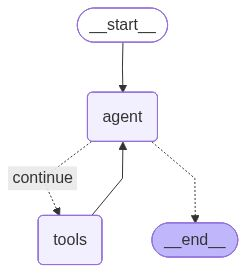

In [59]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

This visualization shows the flow: Agent → Decision → Tools → Agent → Decision → End


## Running the Complete ReAct Agent

### Final Execution


In [75]:
def print_stream(stream):
    """Helper function for formatting the stream nicely."""
    for s in stream:
        message = s["messages"][-1]
        if isinstance(message, tuple):
            print(message)
        else:
            message.pretty_print()

#inputs = {"messages": [HumanMessage(content="What's the weather like in Caboolture, and what should I wear based on the temperature?")]}
#inputs = {"messages": [HumanMessage(content="Calculate 15% of 250 plus the square root of 144")]}
inputs = {"messages": [HumanMessage(content="Find recent AI news and summarize the top 3 articles")]}

print_stream(graph.stream(inputs, stream_mode="values"))

================================ Human Message =================================

Find recent AI news and summarize the top 3 articles
:: call_model :: tool_response :  
:: should_continue :: last_message :  
:: should_continue :: return CONTINUE : 
================================== Ai Message ==================================
Tool Calls:
  search_tool (call_csWF98q4ZZ8uo4Cpmxcp8TfE)
 Call ID: call_csWF98q4ZZ8uo4Cpmxcp8TfE
  Args:
    query: recent AI news
:: tool_node :: AgentState[messages].tool_calls :  [{'name': 'search_tool', 'args': {'query': 'recent AI news'}, 'id': 'call_csWF98q4ZZ8uo4Cpmxcp8TfE', 'type': 'tool_call'}]
:: tool_node :: tool_call iteration :  1
:: tool_node :: tool_call :  {'name': 'search_tool', 'args': {'query': 'recent AI news'}, 'id': 'call_csWF98q4ZZ8uo4Cpmxcp8TfE', 'type': 'tool_call'}
:: tool_node :: tool_result :  5
:: tool_node :: outputs :  1
================================= Tool Message =================================
Name: search_tool

[{"title":

**What You'll See:**
1. **Initial Reasoning**: Agent analyzes the query.
2. **Tool Call 1**: Searches for Zurich weather.
3. **Tool Result Processing**: Agent examines weather data.
4. **Tool Call 2**: Gets clothing recommendations.
5. **Final Synthesis**: Agent combines all information into a helpful response.


### The Complete ReAct Cycle

The final execution demonstrates the full ReAct pattern:

1. **Reasoning**: "I need current weather data for Zurich".
2. **Acting**: Calls search_tool("Zurich weather today").
3. **Observing**: Processes search results, extracts temperature.
4. **Reasoning**: "Now I need clothing recommendations for this temperature".
5. **Acting**: Calls recommend_clothing("temperature from search").
6. **Observing**: Gets clothing suggestions.
7. **Reasoning**: "I can now provide a complete answer".
8. **Final Response**: Synthesizes weather info and clothing recommendations.


## Key Takeaways


### What Makes ReAct Powerful

1. **Transparency**: You can see the agent's reasoning process.
2. **Adaptability**: The agent can handle unexpected results and change course.
3. **Extensibility**: It's easy to add new tools and capabilities.
4. **Reliability**: The structured approach reduces hallucination and improves accuracy


### Best Practices

1. **Tool Design**: Make tools focused and reliable.
2. **Error Handling**: Plan for tool failures and unexpected results.
3. **Context Management**: Keep state manageable and relevant.
4. **User Experience**: Provide clear feedback about what the agent is doing.

The ReAct framework represents a significant step toward more capable and trustworthy AI agents that can reason through complex problems and take meaningful actions in the real world.


# Exercises

Now it's time to put your ReAct knowledge into practice! These exercises will help you build your own tools and extend the agent's capabilities.


## Exercise 1 - Build a Calculator Tool

**Objective:** Create a mathematical calculator tool that can handle complex calculations.

Your task is to create a calculator tool that can perform mathematical operations. This tool should be able to handle expressions like "2 + 3 * 4", "sqrt(16)", and "sin(π/2)".

### Instructions:
1. Create a tool called `calculator_tool` using the `@tool` decorator.
2. The tool should accept a mathematical expression as a string.
3. Use Python's `eval()` function carefully (or better yet, use the `ast` module for safety).
4. Test your tool with various mathematical expressions.
5. Add your tool to the tools list and test it with the ReAct agent.

### Starter Code:


In [73]:
import math
import ast
import operator
import re

print(ast.literal_eval("1 + 10".split()))
      

#@tool
#def calculator_tool(expression: str) -> str:
#    """
#    Safely evaluate mathematical expressions.
#    
#    :param expression: A mathematical expression as a string (e.g., "2 + 3 * 4")
#    :return: The result of the calculation
#    """
    # TODO: Implement safe mathematical evaluation
    # Hint: You can use ast.literal_eval for simple expressions
    # or create a safe evaluator for more complex math
#    pass

# TODO: Add calculator_tool to your tools list
# TODO: Test with the agent: "What's 15% of 250 plus the square root of 144?"

ValueError: malformed node or string: ['1', '+', '10']

## Exercise 2 - Create a News Summary Tool

**Objective:** Build a tool that can fetch and summarize recent news articles.

Create a news summarization tool that works with the existing search functionality. This tool should take search results and create concise summaries of news articles.

### Instructions:
1. Create a `news_summarizer_tool` that takes news content and creates summaries.
2. The tool should extract key information: headline, date, main points.
3. Format the output in a readable way.
4. Test it by asking the agent to "search for recent AI news and summarize the top 3 articles".

### Starter Code:


In [ ]:
@tool
def news_summarizer_tool(news_content: str) -> str:
    """
    Summarize news articles from search results.
    
    :param news_content: Raw news content or search results
    :return: A formatted summary of the news
    """
    # TODO: Parse the news content
    # TODO: Extract key information (headlines, dates, main points)
    # TODO: Format into a readable summary
    # Hint: You might want to split by articles and process each one
    pass

# TODO: Add to tools list and test with:
# "Find recent news about artificial intelligence and give me a summary"

## Testing Your Solutions

For each exercise, test your implementation with these commands:


In [ ]:
# Exercise 1 Test
inputs = {"messages": [HumanMessage(content="Calculate 15% of 250 plus the square root of 144")]}
print_stream(graph.stream(inputs, stream_mode="values"))

In [ ]:
# Exercise 2 Test  
inputs = {"messages": [HumanMessage(content="Find recent AI news and summarize the top 3 articles")]}
print_stream(graph.stream(inputs, stream_mode="values"))

## Authors


[Joseph Santarcangelo](https://author.skills.network/instructors/joseph_santarcangelo): Joseph has a Ph.D. in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

[Tenzin Migmar](https://author.skills.network/instructors/tenzin_migmar): Hi, I'm Tenzin. I'm a data scientist intern at IBM interested in applying machine learning to solve difficult problems. Prior to joining IBM, I worked as a research assistant on projects exploring perspectivism and personalization within large language models. In my free time, I enjoy recreational programming and learning to cook new recipes.

[Faranak Heidari](https://www.linkedin.com/in/faranakhdr/) is a data scientist and AI developer in IBM. 


<!--#### Change Log


<!--
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-02-23|0.2|Elio Di Nino|Update library documentation|
|2020-07-17|0.1|Sam|Create lab template|
-->


Copyright © IBM Corporation. All rights reserved.
